In [2]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from petitRADTRANS.retrieval import plot_style as ps
import scicomap as sc
from astropy.io import fits
plt.rcParams['legend.title_fontsize'] = '20'

species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Using pRT Plotting style!


In [3]:
data_dir = "observations/"
qual_map = sc.ScicoQualitative(cmap='538')
fixed_cmap = qual_map.get_mpl_color_map()
colour_dict = {"HR8799b":fixed_cmap(3/6),
              "HR8799c":fixed_cmap(2/6),
              "HR8799d":fixed_cmap(1/6),
              "HR8799e":fixed_cmap(0/6)}
spectra = {}
distance_scale = (41.2925/10)**2
ylabel = r"F$_{\lambda}$ + offset [W/m$^{2}$/$\mu$m]"
xlabel = "Wavelength [micron]"
version = "v02"

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys([])


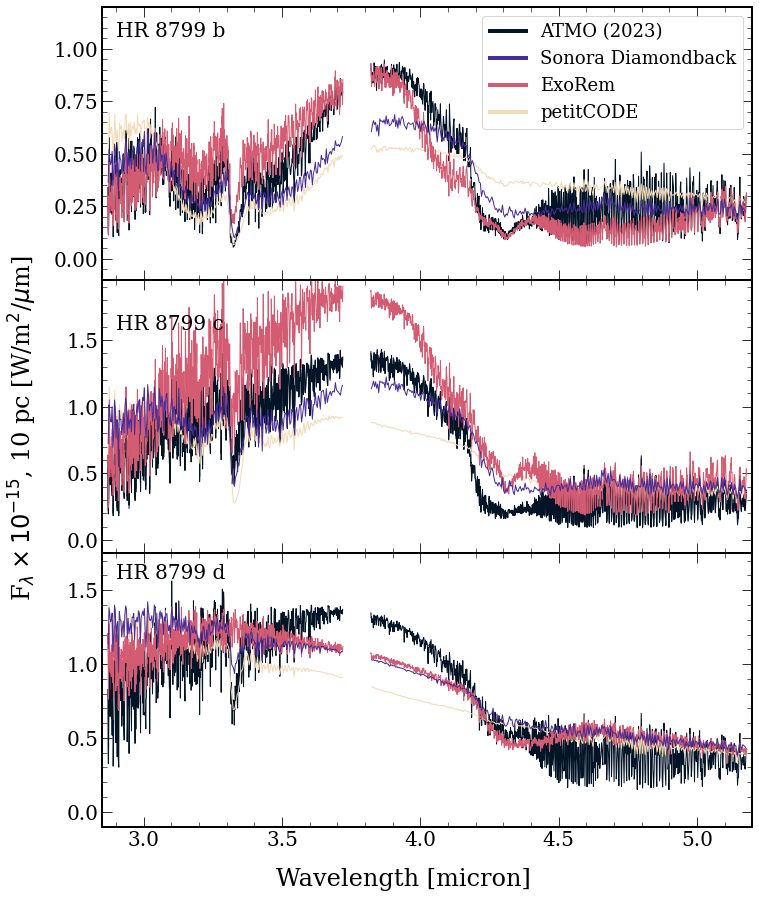

In [15]:
fig, axes = plt.subplots(nrows=3,figsize = (10,12),sharex = True, gridspec_kw={'hspace':0})
ax = axes.flatten()
print(spectra.keys())
instruments = ['SPHERE', 'CHARIS', 'GPI', 'GRAVITY', 'ALES', 'OSIRIS']
planets = ["HR8799b","HR8799c","HR8799d","HR8799e"]
fig.text(0.5, -0.03, 'Wavelength [micron]', ha='center', fontsize = 24)
fig.text(-0.05, 0.5, r'F$_{\lambda} \times 10^{-15}$, 10 pc [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 24)

model_dir = "/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/"

qual_map = sc.ScicoSequential(cmap='heat')
fixed_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":fixed_cmap(6/10),
                     "diamondback":fixed_cmap(3/10),
                     "petrus2023":fixed_cmap(1/10),
                     "petitcode-hot-cloudy":fixed_cmap(9/10),
                     "petitcode-cool-cloudy":fixed_cmap(9/10)}

bfiles = sorted(glob(f"{model_dir}*HR 8799 b*"))
bfiles.reverse()
for f in bfiles:
        if not "3500" in f: continue
        if not "fitcorr" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue

        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>2.87) & (wlen <3.72))
        inds_long = np.where((wlen>3.82) & (wlen <5.18))
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[0].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)
        ax[0].plot(wlen[inds_long],spec[inds_long]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen

cfiles = sorted(glob(f"{model_dir}*HR 8799 c*")) 
cfiles.reverse()

for f in cfiles:
        #if "3500" in f: continue
        if not "3500" in f : 
                continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>2.87) & (wlen <3.72))
        inds_long = np.where((wlen>3.82) & (wlen <5.18))

        #if "3500" in f and "diamondback in f": 
        #        spec = spectres(wlen_old,wlen,spec)
        #        wlen = wlen_old
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[1].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)
        ax[1].plot(wlen[inds_long],spec[inds_long]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen
dfiles = sorted(glob(f"{model_dir}*HR 8799 d*"))
dfiles.reverse()

for f in dfiles:
        if not "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if not "scaled" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        width = 1
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>2.87) & (wlen <3.72))
        inds_long = np.where((wlen>3.82) & (wlen <5.18))

        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[2].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = width, alpha = 1)
        ax[2].plot(wlen[inds_long],spec[inds_long]*distance_scale/1e-15, color = model_color, linewidth = width, alpha = 1)


ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.95)
ax[2].set_ylim(-0.1,1.75)
#ax[3].set_ylim(-0.6e-15,3.8e-15)


ax[0].set_xlim(2.85,5.2)
ax[1].set_xlim(2.85,5.2)
ax[2].set_xlim(2.85,5.2)
#ax[3].set_xlim(2.95,5.2)

ax[0].annotate("HR 8799 b",(2.9,1.06),fontsize = 20, color ='k')
ax[1].annotate("HR 8799 c",(2.9,1.58),fontsize = 20, color ='k')
ax[2].annotate("HR 8799 d",(2.9,1.58),fontsize = 20, color ='k')


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_colour_dict["petrus2023"], lw=4),
                Line2D([0], [0], color=model_colour_dict["diamondback"], lw=4),
                Line2D([0], [0], color=model_colour_dict["exo-rem"], lw=4),   
                Line2D([0], [0], color=model_colour_dict["petitcode-hot-cloudy"], lw=4)
                ]
ax[0].legend(custom_lines, ['ATMO (2023)', 'Sonora Diamondback','ExoRem','petitCODE'],loc = 'upper right',fontsize=18)
plt.savefig(f"plots/HR8799bcd_PredictedG395H_gridfits_{version}.pdf",bbox_inches='tight')

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys([])


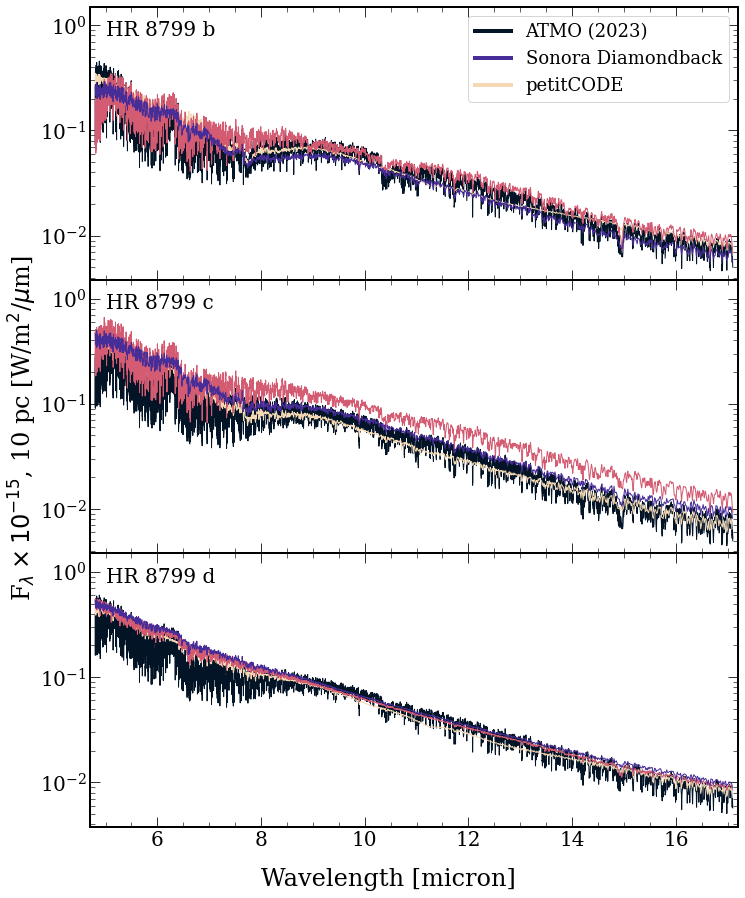

In [18]:
fig, axes = plt.subplots(nrows=3,figsize = (10,12),sharex = True, gridspec_kw={'hspace':0})
ax = axes.flatten()
print(spectra.keys())
instruments = ['SPHERE', 'CHARIS', 'GPI', 'GRAVITY', 'ALES', 'OSIRIS']
planets = ["HR8799b","HR8799c","HR8799d","HR8799e"]
fig.text(0.5, -0.03, 'Wavelength [micron]', ha='center', fontsize = 24)
fig.text(-0.03, 0.5, r'F$_{\lambda} \times 10^{-15}$, 10 pc [W/m$^{2}$/$\mu$m]', va='center', rotation='vertical', fontsize = 24)

model_dir = "/Users/nasedkin/Documents/Paper2_HR8799_Notebooks/grid_fit_spectra/"

qual_map = sc.ScicoSequential(cmap='heat')
fixed_cmap = qual_map.get_mpl_color_map()
model_colour_dict = {"exo-rem":fixed_cmap(6/10),
                     "diamondback":fixed_cmap(3/10),
                     "petrus2023":fixed_cmap(1/10),
                     "petitcode-hot-cloudy":fixed_cmap(9/10),
                     "petitcode-cool-cloudy":fixed_cmap(9/10)}

bfiles = sorted(glob(f"{model_dir}*HR 8799 b*"))
bfiles.reverse()
for f in bfiles:
        if not "3500" in f: continue
        if not "fitcorr" in f:continue
        #if "exo-rem" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>4.8) & (wlen<17.1))
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[0].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen

cfiles = sorted(glob(f"{model_dir}*HR 8799 c*")) 
cfiles.reverse()

for f in cfiles:
        #if "3500" in f: continue
        if not "3500" in f : 
                continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        #if "exo-rem" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>4.8) & (wlen<17.1))  
        #if "3500" in f and "diamondback in f": 
        #        spec = spectres(wlen_old,wlen,spec)
        #        wlen = wlen_old
        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[1].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = 1, alpha = 1)

        wlen_old = wlen
dfiles = sorted(glob(f"{model_dir}*HR 8799 d*"))
dfiles.reverse()

for f in dfiles:
        if not "3500" in f: continue
        if not "fitcorr" in f:continue
        if not "newales" in f:continue
        if not "scaled" in f:continue
        if "cholla" in f:continue
        if "bobcat" in f:continue
        width = 1

        #if "exo-rem" in f:continue
        wlen,spec = np.genfromtxt(f).T
        inds_short = np.where((wlen>4.8) & (wlen<17.1))

        model_name = f.split('/')[-1].split('_')[1]
        model_color = model_colour_dict[model_name]
        ax[2].plot(wlen[inds_short],spec[inds_short]*distance_scale/1e-15, color = model_color, linewidth = width, alpha = 1)


ax[0].set_ylim(0.0038,1.5)
ax[1].set_ylim(0.0038,1.5)
ax[2].set_ylim(0.0038,1.5)

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
#ax[3].set_ylim(-0.6e-15,3.8e-15)


ax[0].set_xlim(4.7,17.2)
ax[1].set_xlim(4.7,17.2)
ax[2].set_xlim(4.7,17.2)
#ax[3].set_xlim(2.95,5.2)

ax[0].annotate("HR 8799 b",(5,0.8),fontsize = 20, color ='k')
ax[1].annotate("HR 8799 c",(5,0.8),fontsize = 20, color ='k')
ax[2].annotate("HR 8799 d",(5,0.8),fontsize = 20, color ='k')
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter,ScalarFormatter

#x_major = LogLocator(base=10.0, subs = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), numticks=4)
#ax[2].xaxis.set_major_locator(x_major)
"""ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

x_minor = LogLocator(base=10, subs=np.arange(4, 20.25, 0.25))
ax[2].xaxis.set_minor_locator(x_minor)
ax[2].xaxis.set_minor_formatter(NullFormatter())
ax[2].set_xticks([5,6,7,8,9,10,11,12,13,14,15,16])
ax[2].get_xaxis().set_major_formatter(ScalarFormatter())"""

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=model_colour_dict["petrus2023"], lw=4),
                Line2D([0], [0], color=model_colour_dict["diamondback"], lw=4),
                #Line2D([0], [0], color=model_colour_dict["exo-rem"], lw=4),   
                Line2D([0], [0], color=model_colour_dict["petitcode-hot-cloudy"], lw=4)
                ]
ax[0].legend(custom_lines, ['ATMO (2023)', 'Sonora Diamondback','petitCODE'],loc = 'upper right',fontsize=18)
plt.savefig(f"plots/HR8799bcd_PredictedMRS_gridfits_{version}.pdf",bbox_inches='tight')